### Problem statement/objective.

The goal is to predict the quality of the wine. Automating the wine selection process will increase profits and build up the business's reputation.

The profit margin of restaurants is approximately 70%. This means that over half the profit of these business types come from wine. On the other hand, there are also major expenses that pertain to wine. From vendors to sommeliers, there are dozens of additional expenses when it comes to finding and purchasing good quality wine.

The purpose is to automate the wine selection process in order to increase profit and build on the business's reputation. This will be done by implementing amodel that predicts the quality of the wine. The profits of the business can no longer support the expenses of the wine selection process. Within a few months, the expenses will exceed the profits of the business and the business will have to close down. The automation of the wine selection process will reduce the expenses by approximately 25%, allowing the business to build its finances and stay in business.

### Exploratory Data Analysis

In [1]:
#Load required packages
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
import matplotlib.pylab as plt

import dmba
from dmba import regressionSummary
from dmba import adjusted_r2_score, AIC_score, BIC_score

%matplotlib inline

In [2]:
%pwd

'C:\\Users\\andre'

In [3]:
cd Documents

C:\Users\andre\Documents


In [32]:
#Load the dataset
WineTest_df = pd.read_csv("winequality-red.csv")
WineTest_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [33]:
#Preprocess columns in dataset
WineTest_df = WineTest_df.copy()

WineTest_df.columns = [d.replace(' ', '_') for d in WineTest_df.columns]
WineTest_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Exploratory Data Analysis (EDA)

In [5]:
#Analyze shape of dataset
print(WineTest_df.shape)
WineTest_df.info()

(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
WineTest_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [23]:
#Search for unique values on 'quality' variable
WineTest_df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Text(0, 0.5, 'Count')

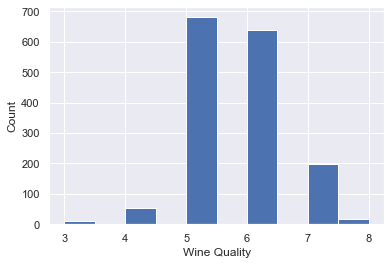

In [8]:
#Create histogram on 'quality' variable
sns.set()
WineTest_df.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

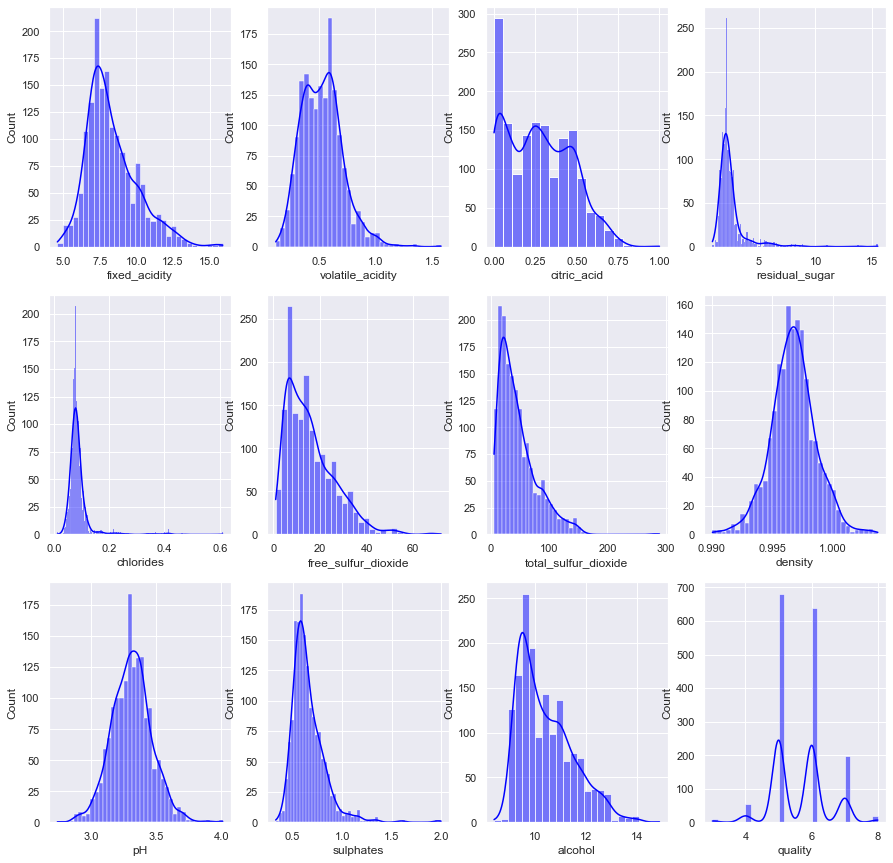

In [49]:

fig, axs = plt.subplots(3, 4, figsize=(15, 15))
columns = WineTest_df.columns[:12]
k=0
sns.set(font_scale=1)
for i in range(3):
    for j in range(4):
        sns.histplot(data=WineTest_df, x=columns[k], kde=True, color="blue", ax=axs[i, j])
        k+=1

#### Analayze the relationships between the predictors and the target variable ('quality').

In [9]:
#Separate target (y) and predictors (x). Set 'quality' as target (y) variable. 
#Next, set 'alcohol' as predictor (x).
y = WineTest_df['quality'].to_numpy()
x = WineTest_df['alcohol'].to_numpy()

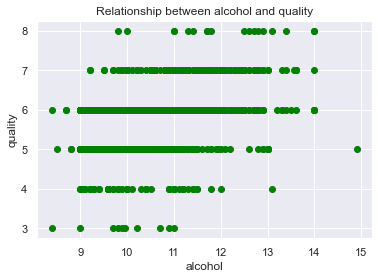

In [10]:
plt.scatter(x, y, c="green")
plt.title('Relationship between alcohol and quality')
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.show()

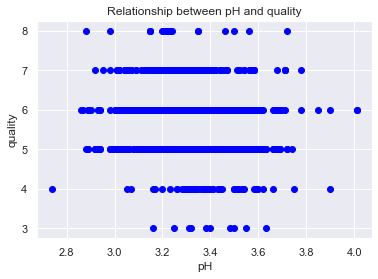

In [11]:
#Retain 'quality' as target (y) variable. Set 'pH' as predictor (x).
y = WineTest_df['quality'].to_numpy()
x = WineTest_df['pH'].to_numpy()

plt.scatter(x, y, c="blue")
plt.title('Relationship between pH and quality')
plt.xlabel('pH')
plt.ylabel('quality')
plt.show()

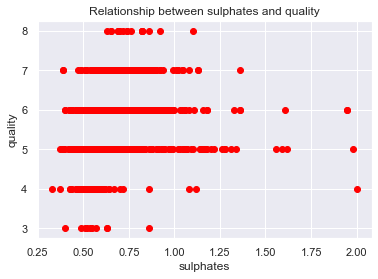

In [12]:
#Retain 'quality' as target (y) variable. Set 'sulphates' as predictor (x).
y = WineTest_df['quality'].to_numpy()
x = WineTest_df['sulphates'].to_numpy()

plt.scatter(x, y, c="red")
plt.title('Relationship between sulphates and quality')
plt.xlabel('sulphates')
plt.ylabel('quality')
plt.show()

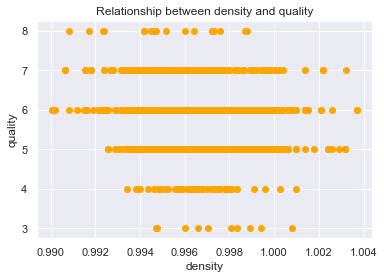

In [13]:
#Retain 'quality' as target (y) variable. Set 'density' as predictor (x).
y = WineTest_df['quality'].to_numpy()
x = WineTest_df['density'].to_numpy()

plt.scatter(x, y, c="orange")
plt.title('Relationship between density and quality')
plt.xlabel('density')
plt.ylabel('quality')
plt.show()

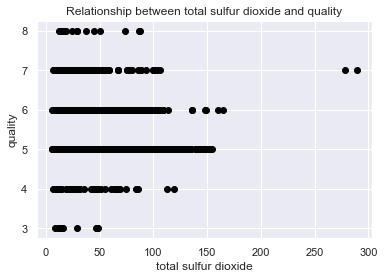

In [15]:
#Retain 'quality' as target (y) variable. Set 'total_sulfur_dioxide' as predictor (x).
y = WineTest_df['quality'].to_numpy()
x = WineTest_df['total sulfur dioxide'].to_numpy()

plt.scatter(x, y, c="black")
plt.title('Relationship between total sulfur dioxide and quality')
plt.xlabel('total sulfur dioxide')
plt.ylabel('quality')
plt.show()

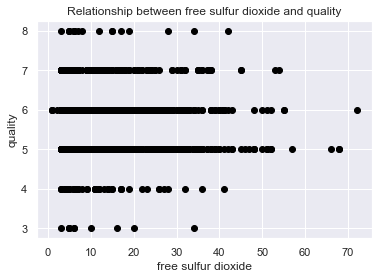

In [16]:
#Retain 'quality' as target (y) variable. Set 'free_sulfur_dioxide' as predictor (x).
y = WineTest_df['quality'].to_numpy()
x = WineTest_df['free sulfur dioxide'].to_numpy()

plt.scatter(x, y, c="black")
plt.title('Relationship between free sulfur dioxide and quality')
plt.xlabel('free sulfur dioxide')
plt.ylabel('quality')
plt.show()

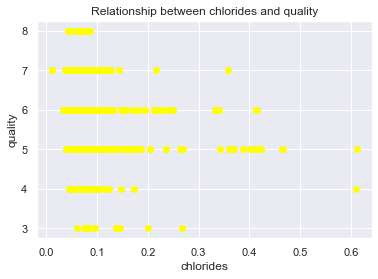

In [17]:
#Retain 'quality' as target (y) variable. Set 'chlorides' as predictor (x).
y = WineTest_df['quality'].to_numpy()
x = WineTest_df['chlorides'].to_numpy()

plt.scatter(x, y, c="yellow")
plt.title('Relationship between chlorides and quality')
plt.xlabel('chlorides')
plt.ylabel('quality')
plt.show()

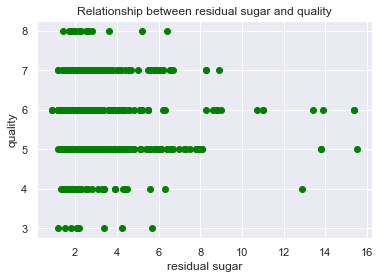

In [18]:
#Retain 'quality' as target (y) variable. Set 'residual_sugar' as predictor (x).
y = WineTest_df['quality'].to_numpy()
x = WineTest_df['residual sugar'].to_numpy()

plt.scatter(x, y, c="green")
plt.title('Relationship between residual sugar and quality')
plt.xlabel('residual sugar')
plt.ylabel('quality')
plt.show()

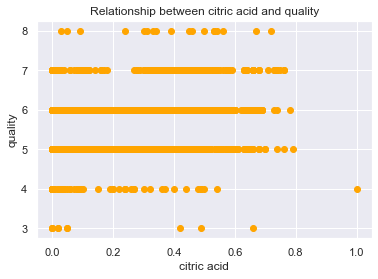

In [19]:
#Retain 'quality' as target (y) variable. Set 'citrid_acid' as predictor (x).
y = WineTest_df['quality'].to_numpy()
x = WineTest_df['citric acid'].to_numpy()

plt.scatter(x, y, c="orange")
plt.title('Relationship between citric acid and quality')
plt.xlabel('citric acid')
plt.ylabel('quality')
plt.show()

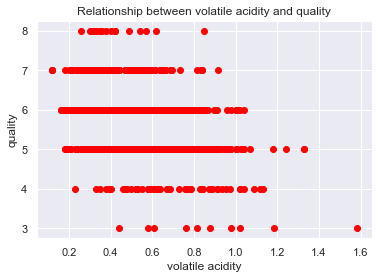

In [20]:
#Retain 'quality' as target (y) variable. Set 'volatile_acidity' as predictor (x).
y = WineTest_df['quality'].to_numpy()
x = WineTest_df['volatile acidity'].to_numpy()

plt.scatter(x, y, c="red")
plt.title('Relationship between volatile acidity and quality')
plt.xlabel('volatile acidity')
plt.ylabel('quality')
plt.show()

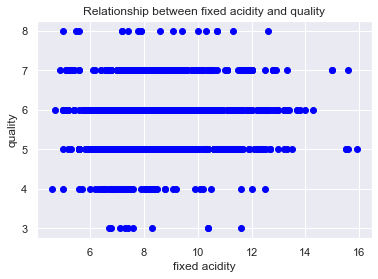

In [21]:
#Retain 'quality' as target (y) variable. Set 'fixed_acidity' as predictor (x).
y = WineTest_df['quality'].to_numpy()
x = WineTest_df['fixed acidity'].to_numpy()

plt.scatter(x, y, c="blue")
plt.title('Relationship between fixed acidity and quality')
plt.xlabel('fixed acidity')
plt.ylabel('quality')
plt.show()

### Data wrangling/pre-processing

In [22]:
#Check data size
WineTest_df.shape

(1599, 12)

In [66]:
#count rows of missing data for each column
missing_number = WineTest_df.isnull().sum().sort_values(ascending=False)
missing_number

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values within the wine dataset.

In [33]:
#Find the duplicates
WineTest_df.duplicated().sum()

240

In [34]:
#Identify correlations of each predictor
WineTest_df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [24]:
WineTest_df.corrwith(WineTest_df["quality"])

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
dtype: float64

Based on the correlation chart, alcohol holds the strongest positive correlation to quality (0.476166) while volatile acidity holds the strongest negatvie correlation to quality (-0.390558).

<AxesSubplot:>

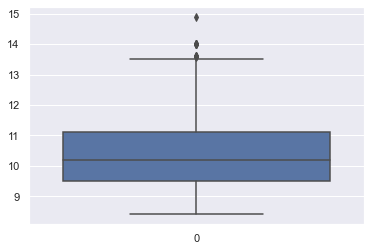

In [88]:
#Evaluate outliers for each predictor and the target variable.
import seaborn as sns
sns.boxplot(WineTest_df['alcohol'])

In [89]:
# Position of the Outlier
print(np.where(WineTest_df['alcohol']>14))

(array([652], dtype=int64),)


<AxesSubplot:>

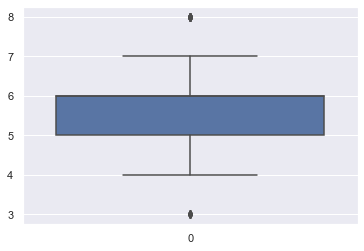

In [102]:
sns.boxplot(WineTest_df['quality'])

<AxesSubplot:>

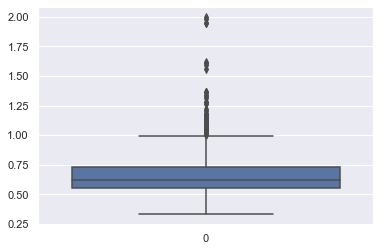

In [90]:
sns.boxplot(WineTest_df['sulphates'])

In [91]:
# Position of the Outlier
print(np.where(WineTest_df['sulphates']>1.50))

(array([ 13,  86,  91,  92, 151, 169, 226, 723], dtype=int64),)


<AxesSubplot:>

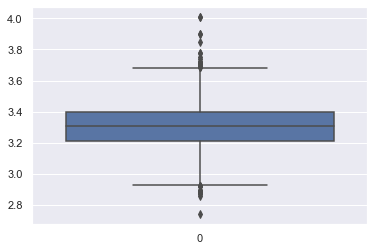

In [70]:
sns.boxplot(WineTest_df['pH'])

In [ ]:
# Position of the Outlier
print(np.where(WineTest_df['alcohol']>14))

<AxesSubplot:>

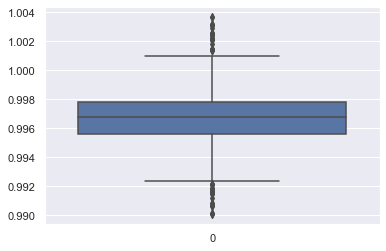

In [71]:
sns.boxplot(WineTest_df['density'])

<AxesSubplot:>

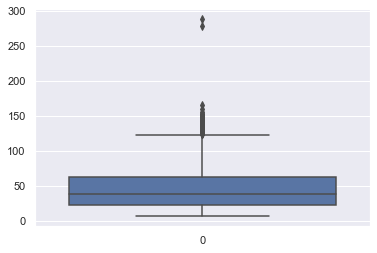

In [92]:
sns.boxplot(WineTest_df['total_sulfur_dioxide'])

In [93]:
# Position of the Outlier
print(np.where(WineTest_df['total_sulfur_dioxide']>200))

(array([1079, 1081], dtype=int64),)


<AxesSubplot:>

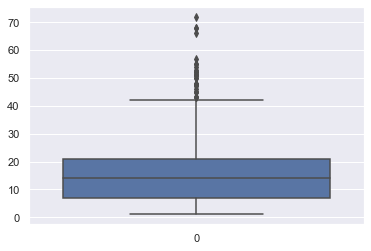

In [86]:
sns.boxplot(WineTest_df['free_sulfur_dioxide'])

In [87]:
# Position of the Outlier
print(np.where(WineTest_df['free_sulfur_dioxide']>60))

(array([ 396,  400, 1244, 1558], dtype=int64),)


<AxesSubplot:>

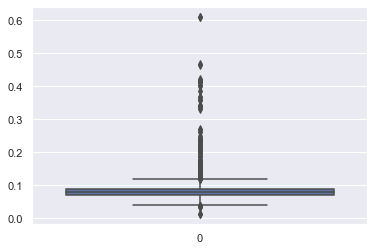

In [94]:
sns.boxplot(WineTest_df['chlorides'])

In [95]:
# Position of the Outlier
print(np.where(WineTest_df['chlorides']>0.5))

(array([151, 258], dtype=int64),)


<AxesSubplot:>

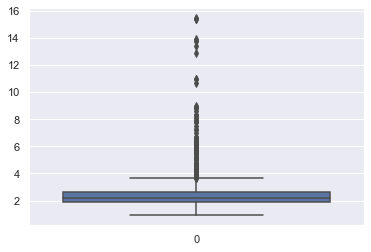

In [96]:
sns.boxplot(WineTest_df['residual_sugar'])

In [97]:
# Position of the Outlier
print(np.where(WineTest_df['residual_sugar']>10))

(array([  33,  324,  325,  480, 1235, 1244, 1434, 1435, 1474, 1476, 1574],
      dtype=int64),)


<AxesSubplot:>

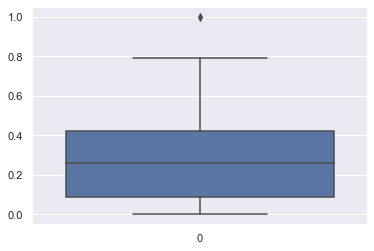

In [98]:
sns.boxplot(WineTest_df['citric_acid'])

In [99]:
# Position of the Outlier
print(np.where(WineTest_df['citric_acid']>0.8))

(array([151], dtype=int64),)


<AxesSubplot:>

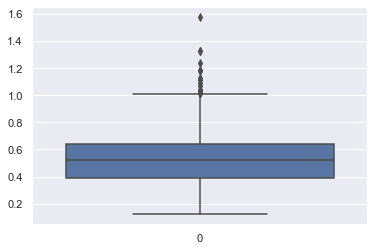

In [100]:
sns.boxplot(WineTest_df['volatile_acidity'])

In [101]:
# Position of the Outlier
print(np.where(WineTest_df['volatile_acidity']>1.4))

(array([1299], dtype=int64),)


<AxesSubplot:>

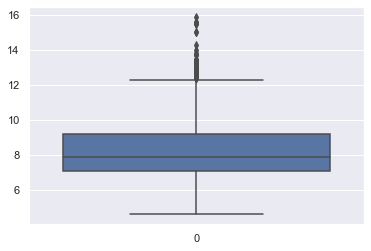

In [78]:
sns.boxplot(WineTest_df['fixed_acidity'])

Based on the visualizations, total sulfur dioxide contains the most outliers.

In [37]:
#Evaluate mean and standard deviation of total sulfur dioxide
TotalWine_df = WineTest_df['total_sulfur_dioxide']
mean = np.mean(WineTest_df['total_sulfur_dioxide'])
std = np.std(WineTest_df['total_sulfur_dioxide'])
print('mean of the dataset is', mean)
print('std. deviation is', std)

mean of the dataset is 46.46779237023139
std. deviation is 32.88503665178374


Sulphates, chlorides, and residual sugar variables also contained significant outliers.

In [45]:
#Evaluate mean and standard deviation of sulphates
TotalWine_df = WineTest_df['sulphates']
mean = np.mean(WineTest_df['sulphates'])
std = np.std(WineTest_df['sulphates'])
print('mean of the dataset is', mean)
print('std. deviation is', std)

mean of the dataset is 0.6581488430268917
std. deviation is 0.16945396724179546


In [46]:
#Evaluate mean and standard deviation of total sulfur dioxide
TotalWine_df = WineTest_df['chlorides']
mean = np.mean(WineTest_df['chlorides'])
std = np.std(WineTest_df['chlorides'])
print('mean of the dataset is', mean)
print('std. deviation is', std)

mean of the dataset is 0.08746654158849279
std. deviation is 0.04705058260331571


In [47]:
#Evaluate mean and standard deviation of total sulfur dioxide
TotalWine_df = WineTest_df['residual_sugar']
mean = np.mean(WineTest_df['residual_sugar'])
std = np.std(WineTest_df['residual_sugar'])
print('mean of the dataset is', mean)
print('std. deviation is', std)

mean of the dataset is 2.53880550343965
std. deviation is 1.4094871124880495


### Data splitting

#### Split the data into train and test.

In [108]:
y = WineTest_df['quality'].to_numpy()
x = WineTest_df.drop(columns=['quality'])

In [109]:
#Standardize the dataset
scaler = preprocessing.StandardScaler()
x_norm = scaler.fit_transform(x * 1.0)

In [110]:
#Split the full dataframe into 60/40.
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.4, 
                                                      random_state=1)
train_x.shape, test_x.shape

((959, 11), (640, 11))